In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
df = pd.read_csv(f"{digit_recognizer_path}/train.csv")

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x = df.drop(columns = 'label')
y = df['label']

In [11]:
x.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y.sample(5)

11490    5
30283    6
18402    9
25817    5
5289     5
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt

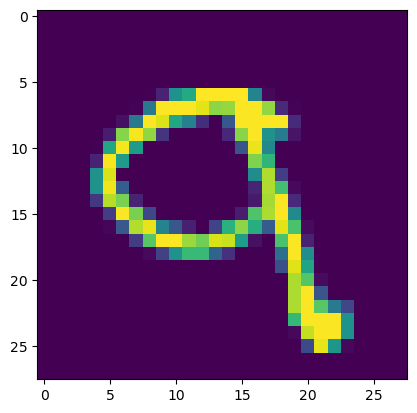

In [13]:
plt.imshow(x.iloc[30584].values.reshape(28, 28))

In [17]:
y[30584]

9

In [18]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=None)

In [45]:
x_pca = pca.fit_transform(x)

In [46]:
x_pca.shape

(42000, 784)

In [47]:
x_pca

array([[-6.61595780e+02,  6.99311328e+02, -1.83282040e+02, ...,
        -3.80180659e-12,  4.35157766e-12,  6.42456986e-11],
       [ 1.70145168e+03,  3.60551556e+02,  5.01805594e+02, ...,
        -2.99867161e-11,  4.24759536e-11,  9.98091844e-10],
       [-8.86894434e+02,  2.93765782e+02, -6.71553099e+01, ...,
        -2.60270913e-12,  5.24478287e-12,  2.38825749e-10],
       ...,
       [ 3.36269982e+02, -9.50015280e+02,  1.68605414e+02, ...,
        -2.34478946e-12, -3.73365384e-13, -1.39385875e-10],
       [ 3.27399392e+02, -6.20160894e+01, -6.97536401e+02, ...,
         1.69551796e-11, -1.90832309e-11, -3.68041907e-10],
       [-3.64249200e+02, -4.18893026e+02, -6.28998232e+01, ...,
        -1.29212845e-11,  1.16804777e-11,  2.39071165e-10]])

Eigen Values

In [48]:
pca.explained_variance_.shape

(784,)

Eigen Vectors

In [49]:
pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(x_pca, y)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(x_pca)

In [39]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y, y_pred)

0.9791428571428571

In [55]:
pca.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

In [56]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09748938, 0.16909204, 0.23055107, 0.28434409, 0.33328671,
       0.37631885, 0.40908936, 0.43801039, 0.46567942, 0.48916813,
       0.51016138, 0.53075139, 0.54777693, 0.5647048 , 0.58051606,
       0.59534846, 0.60854534, 0.62137261, 0.63325237, 0.64477992,
       0.65550183, 0.66565382, 0.67530285, 0.68443131, 0.69330771,
       0.70169538, 0.70981394, 0.71758799, 0.72499434, 0.73186096,
       0.73844078, 0.74482877, 0.75082244, 0.75671157, 0.76235492,
       0.76776459, 0.77285681, 0.77773186, 0.78248756, 0.787153  ,
       0.79168253, 0.79613242, 0.80031497, 0.80429003, 0.80813545,
       0.81188465, 0.81549478, 0.81898   , 0.82234488, 0.82555226,
       0.82870693, 0.83179839, 0.83473548, 0.83760089, 0.84040849,
       0.84310467, 0.84576298, 0.84832597, 0.85086418, 0.85332596,
       0.85572312, 0.85811052, 0.86038644, 0.86260162, 0.86474096,
       0.86680229, 0.8688308 , 0.87079057, 0.87272695, 0.87461181,
       0.87647932, 0.87829602, 0.88006493, 0.88179085, 0.88345

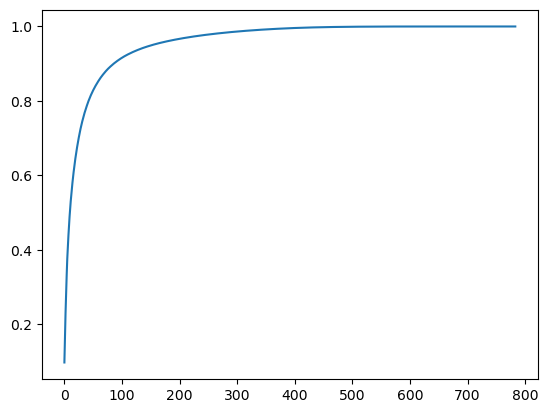

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))